In [ ]:
# Scenario (reframed):

# You are a data scientist working for a real estate analytics company.
# Your goal is to build a regression model to understand what drives house prices and to predict future prices.

# You’ll use the BostonHousing dataset with these columns:

# Key variables:

# Target (y):

# medv – median home value (in $1000s)

# Candidate features (X):

# rm – average number of rooms per dwelling

# lstat – % of lower status population

# ptratio – pupil-teacher ratio


# You will:

# 1 do EDA

# 2 check correlations

# 3 build a multiple regression model

# 4 compute R², Adjusted R², RSS

# 5 evaluate residuals

# 6 make a future prediction

In [20]:
# Import the libraries.
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy import stats
from sklearn.linear_model import LinearRegression

#Load CSV data 

data = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv")

data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
# No empty rows or NaN's 

In [6]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df = data.copy()

# Drop not required data 
df.drop(['crim'], axis=1, inplace=True)
df.drop(['zn'], axis=1, inplace=True)
df.drop(['indus'], axis=1, inplace=True)
df.drop(['chas'], axis=1, inplace=True)
df.drop(['nox'], axis=1, inplace=True)
df.drop(['age'], axis=1, inplace=True)
df.drop(['dis'], axis=1, inplace=True)
df.drop(['rad'], axis=1, inplace=True)
df.drop(['tax'], axis=1, inplace=True)
df.drop(['b'], axis=1, inplace=True)

# see new updated table
df.head()

,rm,ptratio,lstat,medv
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


In [ ]:
# assign axis x, y

y = df['medv'] #Target
X = data[["rm", "lstat", "ptratio"]]   # features

In [ ]:
# Visualization (boxplot, heathmap, scatterplot)

In [21]:
# Plot boxplots for each feature and the target.


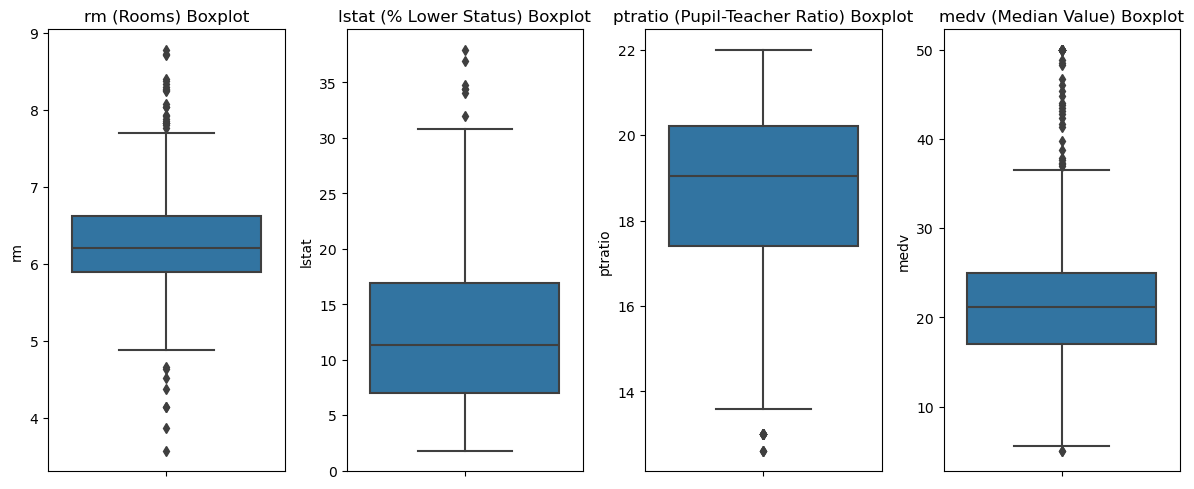

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for features and target
plt.figure(figsize=(12, 5))

plt.subplot(1, 4, 1)
sns.boxplot(y=data["rm"])
plt.title("rm (Rooms) Boxplot")

plt.subplot(1, 4, 2)
sns.boxplot(y=data["lstat"])
plt.title("lstat (% Lower Status) Boxplot")

plt.subplot(1, 4, 3)
sns.boxplot(y=data["ptratio"])
plt.title("ptratio (Pupil-Teacher Ratio) Boxplot")

plt.subplot(1, 4, 4)
sns.boxplot(y=data["medv"])
plt.title("medv (Median Value) Boxplot")

plt.tight_layout()
plt.show()


In [ ]:
# Note

# Boxplot shows each variable on both axis has some outliers, the median value has all outliers on the upper end of the plot 
# meaning it contains some highly valuable homes.
# Number of rooms has outliers both downwards and upwards.
# The of status population shows more on the lower end and a few high outliers. 
# Teacher population is skewed upwards
# Outliers in the input features can disproportionately influence the regression coefficients, potentially leading to 
# misleading conclusions about feature importance based on the coefficient values.
# Outliers in the target variable are typically more problematic. Such cases often necessitate a more complex model 
# to accommodate the extreme data points, which can complicate the modeling process and potentially reduce the model's 
# interpretability and robustness.

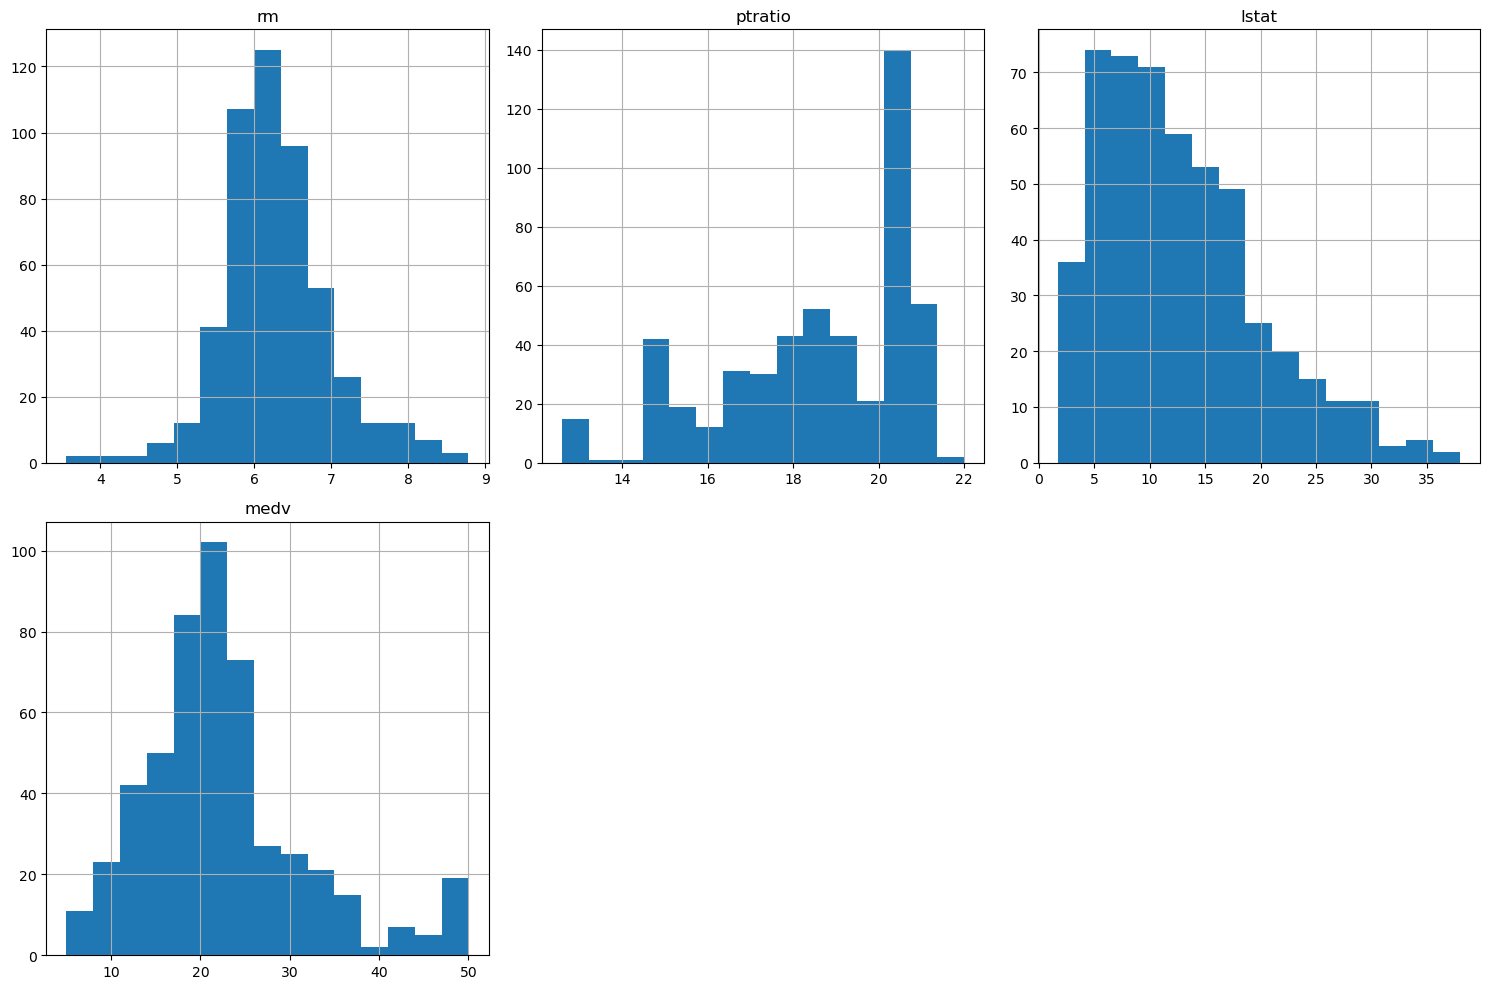

In [13]:
# Plot histograms for each feature and target.
df.hist(bins=15, figsize=(15, 10), layout=(2, 3))
plt.tight_layout()
plt.show()

In [ ]:

# Note

# The distributions of all input features appear heavily skewed, violating the assumption of normality. 
# As Pearson correalation test only test normal "bell shaped" distribution we need to use Spearman.
# Therefore, Spearman's correlation is more appropriate in this case as it does not rely on the assumption of normality. 
# is better suited for skewed data, and is more robust to outliers.

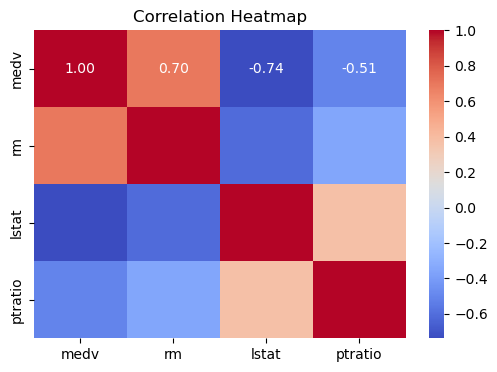

In [15]:
# Spearman Correlation

plt.figure(figsize=(6, 4))
corr = data[["medv", "rm", "lstat", "ptratio"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
corr # in numbers

,medv,rm,lstat,ptratio
medv,1.000000,0.695360,-0.737663,-0.507787
rm,0.695360,1.000000,-0.613808,-0.355501
lstat,-0.737663,-0.613808,1.000000,0.374044
ptratio,-0.507787,-0.355501,0.374044,1.000000


In [ ]:
# Note 

# we can deduct:
# 1. Median Home value (medv )in negative correlation -0.73 with lower status population.
# 2. The number of teachers in the population (ptratio) does not a significant correlation 0.507  to Median Home value (medv ).
# 3. The number of rooms per home (rm) has a high positive correlation (0.69) to Median Home value (medv)

In [ ]:
#Linear regression model

In [29]:

x = data[["rm", "lstat", "ptratio"]]   
y = data["medv"]  

model = LinearRegression()
model.fit(x, y)


print("Intercept:", model.intercept_)
print("Coefficients:", dict(zip(x.columns, model.coef_)))

# 5. Evaluate: R², Adjusted R², RSS
r2 = model.score(x, y)
n = len(y)
p = x.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

y_pred = model.predict(x)
residuals = y - y_pred
RSS = np.sum(residuals**2)

print("R-squared:", r2)
print("Adjusted R-squared:", adj_r2)
print("RSS:", RSS)

Intercept: 18.567111505395268
Coefficients: {'rm': 4.515420943855419, 'lstat': -0.5718056878724758, 'ptratio': -0.9307225552706215}
R-squared: 0.6786241601613112
Adjusted R-squared: 0.6767035874132712
RSS: 13727.985313799512


In [ ]:
# Note:

# The R-squared and adjusted R-squared values are nearly identical, indicating that including all features is appropriate 
# and does not result in over-fitting.
# The model leaves about 33% of the variance in 'medv' unexplained (R-squared = 0.67)
# RSS high at 13727

In [ ]:
# check non-linearity 

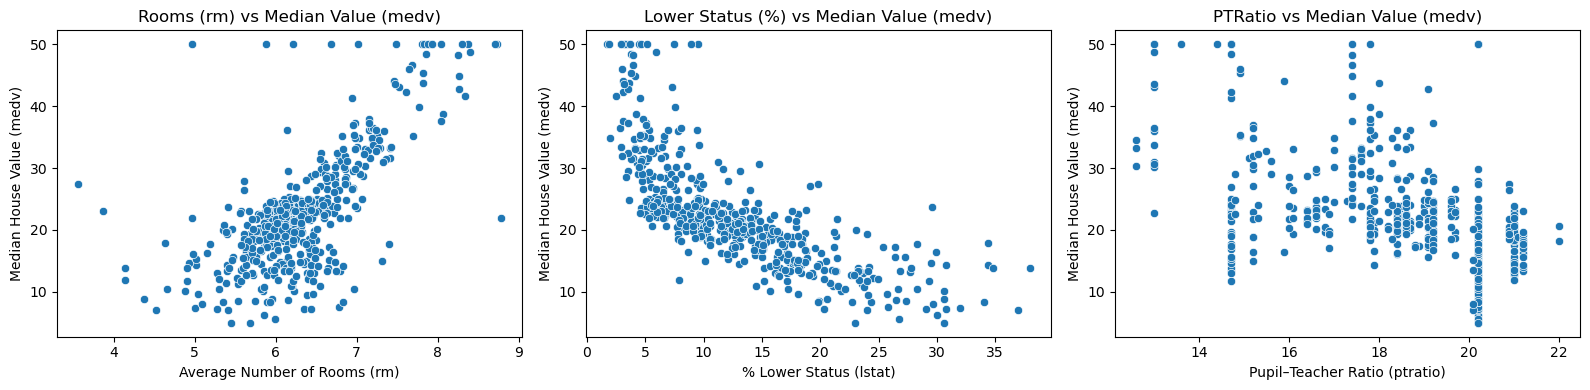

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 4))

# Scatter: rm vs medv
plt.subplot(1, 3, 1)
sns.scatterplot(x=data["rm"], y=data["medv"])
plt.title("Rooms (rm) vs Median Value (medv)")
plt.xlabel("Average Number of Rooms (rm)")
plt.ylabel("Median House Value (medv)")

# Scatter: lstat vs medv
plt.subplot(1, 3, 2)
sns.scatterplot(x=data["lstat"], y=data["medv"])
plt.title("Lower Status (%) vs Median Value (medv)")
plt.xlabel("% Lower Status (lstat)")
plt.ylabel("Median House Value (medv)")

# Scatter: ptratio vs medv
plt.subplot(1, 3, 3)
sns.scatterplot(x=data["ptratio"], y=data["medv"])
plt.title("PTRatio vs Median Value (medv)")
plt.xlabel("Pupil–Teacher Ratio (ptratio)")
plt.ylabel("Median House Value (medv)")

plt.tight_layout()
plt.show()


In [ ]:
# note 

# Rooms vs Median Value Strong positive trend 
# Lower Status vs Median Value Strong negative trend 
# Teacher ratio  vs  Median Value moderate relation 

# These non-linear patterns are likely one of the reasons why the linear regression model achieves an R-squared of 
# only 0.59, as it may not be able to fully capture the complexity of the relationships within the data.

In [ ]:
# Different models

# In this case, we have recognised that the issue of multi-collinearity is not significant because of the low correlation among 
# the input features. As a result, we can keep all the features while fitting the model.

# As an academic exercise, we can remove the features one at a time to see the impact on the model.

In [32]:
from sklearn.linear_model import LinearRegression

features = x.columns.tolist()

for feature in features:
    # Create a new subset of features by removing 1 feature at a time.
    x_subset = x.drop(feature, axis=1)

    # Initialise and fit the model.
    model_subset = LinearRegression()
    model_subset.fit(x_subset, y)

    # Predict.
    y_pred_subset = model_subset.predict(x_subset)

    # Calculate metrics.
    r2_subset = r2_score(y, y_pred_subset)
    adj_r2_subset = 1 - (1 - r2_subset) * (n - 1) / (n - x_subset.shape[1] - 1)
    rss_subset = np.sum((y - y_pred_subset) ** 2)

    # Display the results.
    print(f"Model without '{feature}':")
    print(f"  R²: {r2_subset:.4f}")
    print(f"  Adjusted R²: {adj_r2_subset:.4f}")
    print(f"  RSS: {rss_subset:.4f}\n")

Model without 'rm':
  R²: 0.6067
  Adjusted R²: 0.6051
  RSS: 16802.2577

Model without 'lstat':
  R²: 0.5613
  Adjusted R²: 0.5595
  RSS: 18741.6267

Model without 'ptratio':
  R²: 0.6386
  Adjusted R²: 0.6371
  RSS: 15439.3092



In [ ]:
# Note

# We have some really interesting results as correlation between rm vs medv is the strongest dropping rm has the least impact on 
# R-squared. 
# This happens because when you fit the full regression model, the situation changes because of multicollinearity 
# variables overlapping in the information they provide.

# rm and lstat are correlated because homes with more rooms tend to have fewer lower-status residents so rm and lstat 
# partly explain the same variation in house prices.